In [3]:
import pandas as pd 
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import numpy as np
import torch

### Chart Function

In [4]:
def plot_results(file_paths, labels):
    """
    Plots various metrics from machine learning training runs.

    Parameters:
    - file_paths: List of strings representing the file paths to CSV files.
    - labels: List of strings representing the labels for each dataset.
    """

    # Read DataFrames
    dataframes = [pd.read_csv(fp) for fp in file_paths]
    num_datasets = len(dataframes)

    # Extract data
    epochs_list = [df['Epoch'] for df in dataframes]
    test_accuracy_list = [df['Test Accuracy'] for df in dataframes]
    test_error_list = [df['Test Error'] for df in dataframes]
    training_loss_list = [df['Training Loss'] for df in dataframes]
    test_loss_list = [df['Test Loss'] for df in dataframes]
    x_k_list = [df['x_k Comparison'] if 'x_k Comparison' in df.columns else pd.Series([0] * len(df)) for df in dataframes]
    x_ag_k_list = [df['x_ag_k Comparison'] if 'x_ag_k Comparison' in df.columns else pd.Series([0] * len(df)) for df in dataframes]

    # Square the gradient norms
    training_grad_norm_squared_list = [df['Training Gradient Norm']**2 for df in dataframes]
    test_grad_norm_squared_list = [df['Test Gradient Norm']**2 for df in dataframes]
    total_training_time_list = [df['Training Time (s)'].cumsum() for df in dataframes]

    # Check if Epochs are the same across datasets
    epochs = epochs_list[0]
    for idx, e in enumerate(epochs_list[1:], start=1):
        if not epochs.equals(e):
            print(f"Warning: Epochs in dataset {idx+1} differ from the first dataset.")

    # Set up colors using a colormap
    cmap_name = 'tab10' if num_datasets <= 10 else 'tab20'
    cmap = plt.get_cmap(cmap_name)
    colors = [cmap(i % cmap.N) for i in range(num_datasets)]

    # Create subplots with 7 rows and 2 columns
    fig, axes = plt.subplots(7, 2, figsize=(20, 38))

    # Row 1: Test Accuracy over Epochs and Training Time
    # Plot 1: Test Accuracy over Epochs (left plot)
    for i in range(num_datasets):
        axes[0, 0].plot(epochs_list[i], test_accuracy_list[i], label=labels[i], color=colors[i])
    axes[0, 0].axhline(y=0.68, color='gray', linestyle='--', linewidth=1)
    axes[0, 0].set_xlabel('Epoch')
    axes[0, 0].set_ylabel('Test Accuracy')
    axes[0, 0].set_title(f'Test Accuracy over {len(epochs)} Epochs')
    axes[0, 0].legend()

    # Plot 2: Test Accuracy vs Total Training Time (right plot)
    for i in range(num_datasets):
        axes[0, 1].plot(total_training_time_list[i], test_accuracy_list[i], label=labels[i], color=colors[i])
    axes[0, 1].axhline(y=0.68, color='gray', linestyle='--', linewidth=1)
    axes[0, 1].set_xlabel('Training Time (s)')
    axes[0, 1].set_ylabel('Test Accuracy')
    axes[0, 1].set_title('Test Accuracy vs Total Training Time')
    axes[0, 1].legend()

    # Row 2: Training Loss over Epochs and Test Loss over Epochs
    # Plot 3: Training Loss over Epochs (left plot)
    for i in range(num_datasets):
        axes[1, 0].plot(epochs_list[i], training_loss_list[i], label=labels[i], color=colors[i])
    axes[1, 0].set_xlabel('Epoch')
    axes[1, 0].set_ylabel('Training Loss')
    axes[1, 0].set_title(f'Training Loss over {len(epochs)} Epochs')
    axes[1, 0].legend()

    # Plot 4: Test Loss over Epochs (right plot)
    for i in range(num_datasets):
        axes[1, 1].plot(epochs_list[i], test_loss_list[i], label=labels[i], color=colors[i])
    axes[1, 1].set_xlabel('Epoch')
    axes[1, 1].set_ylabel('Test Loss')
    axes[1, 1].set_title(f'Test Loss over {len(epochs)} Epochs')
    axes[1, 1].legend()

    # Row 3: Training Gradient Norm Squared over Epochs and Test Gradient Norm Squared over Epochs
    # Plot 5: Training Gradient Norm Squared over Epochs (left plot)
    for i in range(num_datasets):
        axes[2, 0].plot(epochs_list[i], training_grad_norm_squared_list[i], label=labels[i], color=colors[i])
    axes[2, 0].set_xlabel('Epoch')
    axes[2, 0].set_ylabel('Gradient Norm Squared')
    axes[2, 0].set_title(f'Training Gradient Norm Squared over {len(epochs)} Epochs')
    axes[2, 0].legend()

    # Plot 6: Test Gradient Norm Squared over Epochs (right plot)
    for i in range(num_datasets):
        axes[2, 1].plot(epochs_list[i], test_grad_norm_squared_list[i], label=labels[i], color=colors[i])
    axes[2, 1].set_xlabel('Epoch')
    axes[2, 1].set_ylabel('Gradient Norm Squared')
    axes[2, 1].set_title(f'Test Gradient Norm Squared over {len(epochs)} Epochs')
    axes[2, 1].legend()

    # Row 4: Training Loss vs Total Training Time and Test Loss vs Total Training Time
    # Plot 7: Training Loss vs Total Training Time (left plot)
    for i in range(num_datasets):
        axes[3, 0].plot(total_training_time_list[i], training_loss_list[i], label=labels[i], color=colors[i])
    axes[3, 0].set_xlabel('Training Time (s)')
    axes[3, 0].set_ylabel('Training Loss')
    axes[3, 0].set_title('Training Loss vs Total Training Time')
    axes[3, 0].legend()

    # Plot 8: Test Loss vs Total Training Time (right plot)
    for i in range(num_datasets):
        axes[3, 1].plot(total_training_time_list[i], test_loss_list[i], label=labels[i], color=colors[i])
    axes[3, 1].set_xlabel('Training Time (s)')
    axes[3, 1].set_ylabel('Test Loss')
    axes[3, 1].set_title('Test Loss vs Total Training Time')
    axes[3, 1].legend()

    # Row 5: Training Gradient Norm Squared vs Total Training Time and Test Gradient Norm Squared vs Total Training Time
    # Plot 9: Training Gradient Norm Squared vs Total Training Time (left plot)
    for i in range(num_datasets):
        axes[4, 0].plot(total_training_time_list[i], training_grad_norm_squared_list[i], label=labels[i], color=colors[i])
    axes[4, 0].set_xlabel('Training Time (s)')
    axes[4, 0].set_ylabel('Gradient Norm Squared')
    axes[4, 0].set_title('Training Gradient Norm Squared vs Total Training Time')
    axes[4, 0].legend()

    # Plot 10: Test Gradient Norm Squared vs Total Training Time (right plot)
    for i in range(num_datasets):
        axes[4, 1].plot(total_training_time_list[i], test_grad_norm_squared_list[i], label=labels[i], color=colors[i])
    axes[4, 1].set_xlabel('Training Time (s)')
    axes[4, 1].set_ylabel('Gradient Norm Squared')
    axes[4, 1].set_title('Test Gradient Norm Squared vs Total Training Time')
    axes[4, 1].legend()

    # Row 6: Test Error Rate over Epochs and Training Time
    # Plot 11: Test Error Rate vs Epoch (left plot)
    for i in range(num_datasets):
        axes[5, 0].plot(epochs_list[i], test_error_list[i], label=labels[i], color=colors[i])
    axes[5, 0].set_xlabel('Epoch')
    axes[5, 0].set_ylabel('Test Error')
    axes[5, 0].set_title(f'Test Error over {len(epochs)} Epochs')
    axes[5, 0].legend()

    # Plot 12: Test Error Rate vs Training Time (right plot)
    for i in range(num_datasets):
        axes[5, 1].plot(total_training_time_list[i], test_error_list[i], label=labels[i], color=colors[i])
    axes[5, 1].set_xlabel('Training Time (s)')
    axes[5, 1].set_ylabel('Test Error')
    axes[5, 1].set_title('Test Error vs Total Training Time')
    axes[5, 1].legend()

    # Row 7: x_bar and x_k comparisons
    # Plot 11: x_bar vs x_k vs Epoch (left plot)
    for i in range(num_datasets):
        axes[6, 0].plot(epochs_list[i], x_k_list[i], label=labels[i], color=colors[i])
    axes[6, 0].set_xlabel('Epoch')
    axes[6, 0].set_ylabel('||x_bar - x_k||')
    axes[6, 0].set_title(f'||x_bar - x_k|| over {len(epochs)} Epochs')
    axes[6, 0].legend()

    # Plot 12: x_bar vs x_ag_k vs Epoch (right plot)
    for i in range(num_datasets):
        axes[6, 1].plot(epochs_list[i], x_ag_k_list[i], label=labels[i], color=colors[i])
    axes[6, 1].set_xlabel('Epoch')
    axes[6, 1].set_ylabel('||x_bar - x_ag_k||')
    axes[6, 1].set_title(f'||x_bar - x_ag_k|| over {len(epochs)} Epochs')
    axes[6, 1].legend()

    # Adjust the layout
    plt.tight_layout()

    # Show the plot
    plt.show()

### n = 2000, m = 1000, Hinge Loss

##### GNOM

In [ ]:
# GNOM with lr 0.02, 0.01, 0.008, 0.005

lr_0_02_file_path = "generated/hinge/n_2000_m_1000/GNOM/lr-0.02/200/no_batching/no_wd/2024-10-25-14:50:38/results.csv"
lr_0_01_file_path = "generated/hinge/n_2000_m_1000/GNOM/lr-0.01/200/no_batching/no_wd/2024-10-25-14:50:50/results.csv"
lr_0_008_file_path = "generated/hinge/n_2000_m_1000/GNOM/lr-0.008/200/no_batching/no_wd/2024-10-25-14:51:08/results.csv"
lr_0_005_file_path = "generated/hinge/n_2000_m_1000/GNOM/lr-0.005/200/no_batching/no_wd/2024-10-25-14:51:34/results.csv"

files = [ lr_0_02_file_path, lr_0_01_file_path, lr_0_008_file_path, lr_0_005_file_path]
labels = ["GNOM, lr=0.02", "GNOM, lr=0.01", "GNOM, lr=0.008", "GNOM, lr=0.005"]

plot_results(files, labels)

In [ ]:
#GNOM with lr 0.1, 0.05, 0.02
lr_0_5_file_path = "generated/hinge/n_2000_m_1000/GNOM/lr-0.5/200/no_batching/no_wd/2024-10-25-14:57:45/results.csv"
lr_0_1_file_path = "generated/hinge/n_2000_m_1000/GNOM/lr-0.1/200/no_batching/no_wd/2024-10-25-14:55:28/results.csv"
lr_0_05_file_path = "generated/hinge/n_2000_m_1000/GNOM/lr-0.05/200/no_batching/no_wd/2024-10-25-14:55:46/results.csv"
lr_0_02_file_path = "generated/hinge/n_2000_m_1000/GNOM/lr-0.02/200/no_batching/no_wd/2024-10-25-14:50:38/results.csv"

files = [lr_0_5_file_path, lr_0_1_file_path, lr_0_05_file_path, lr_0_02_file_path]
labels = [ "GNOM, lr=0.5","GNOM, lr=0.1", "GNOM, lr=0.05", "GNOM, lr=0.02"]

plot_results(files, labels)

In [ ]:
#GNOM with lr 0.45, 0.4, 0.3, 0.25

lr_0_4_file_path = "generated/hinge/n_2000_m_1000/GNOM/lr-0.4/200/no_batching/no_wd/2024-10-25-15:05:33/results.csv" #best
lr_0_3_file_path = "generated/hinge/n_2000_m_1000/GNOM/lr-0.3/200/no_batching/no_wd/2024-10-25-15:05:57/results.csv"
lr_0_25_file_path = "generated/hinge/n_2000_m_1000/GNOM/lr-0.25/200/no_batching/no_wd/2024-10-25-15:01:35/results.csv"

files = [ lr_0_4_file_path, lr_0_3_file_path, lr_0_25_file_path]
labels = [ "GNOM, lr=0.4", "GNOM, lr=0.3", "GNOM, lr=0.25"]

plot_results(files, labels)

In [ ]:
# GNOM with batch = 1, lr = 0.001, 0.0001, 0.00001

#file_path1 = "generated/hinge/n_2000_m_1000/GNOM/lr-0.001/20/1/no_wd/2024-10-25-15:14:31/results.csv"
file_path2 = "generated/hinge/n_2000_m_1000/GNOM/lr-0.0001/20/1/no_wd/2024-10-25-15:16:28/results.csv" #best
file_path3 = "generated/hinge/n_2000_m_1000/GNOM/lr-1e-05/20/1/no_wd/2024-10-25-15:17:35/results.csv"

files = [ file_path2, file_path3]
labels = [ "GNOM, batch=1, lr=0.0001", "GNOM, batch=1, lr=0.00001"]

plot_results(files, labels)

In [ ]:
# GNOM with lr = 0.1, and batch= {full, 256, 128, 64, 32}

file_path1 = "generated/hinge/n_2000_m_1000/GNOM/lr-0.1/200/no_batching/no_wd/2024-10-25-14:55:28/results.csv"
file_path2 = "generated/hinge/n_2000_m_1000/GNOM/lr-0.1/200/256/no_wd/2024-10-25-15:24:31/results.csv"
file_path3 = "generated/hinge/n_2000_m_1000/GNOM/lr-0.1/200/128/no_wd/2024-10-25-15:24:59/results.csv" #best
file_path4 = "generated/hinge/n_2000_m_1000/GNOM/lr-0.1/200/32/no_wd/2024-10-25-15:25:31/results.csv"
files = [file_path1, file_path2, file_path3, file_path4]
labels = ["GNOM, full", "GNOM, batch=256", "GNOM, batch=128", "GNOM, batch=32"]

plot_results(files, labels)

In [ ]:
# GNOM with lr = 0.01, and batch= {256, 128, 64, 32}

file_path1 = "generated/hinge/n_2000_m_1000/GNOM/lr-0.01/200/256/no_wd/2024-10-25-15:29:52/results.csv"
file_path2 = "generated/hinge/n_2000_m_1000/GNOM/lr-0.01/200/128/no_wd/2024-10-25-15:29:36/results.csv"
file_path3 = "generated/hinge/n_2000_m_1000/GNOM/lr-0.01/200/64/no_wd/2024-10-25-15:29:18/results.csv"
file_path4 = "generated/hinge/n_2000_m_1000/GNOM/lr-0.01/200/32/no_wd/2024-10-25-15:28:56/results.csv" # best

files = [file_path1, file_path2, file_path3, file_path4]
labels = ["GNOM, 256", "GNOM, batch=128", "GNOM, batch=64", "GNOM, batch=32"]

plot_results(files, labels)

In [ ]:
# GNOM with lr = 0.001, and batch= {128, 64, 32, 4}

file_path1 = "generated/hinge/n_2000_m_1000/GNOM/lr-0.001/200/128/no_wd/2024-10-25-15:39:09/results.csv"
file_path2 = "generated/hinge/n_2000_m_1000/GNOM/lr-0.001/200/64/no_wd/2024-10-25-15:39:24/results.csv"
file_path3 = "generated/hinge/n_2000_m_1000/GNOM/lr-0.001/200/32/no_wd/2024-10-25-15:39:40/results.csv"
file_path4 = "generated/hinge/n_2000_m_1000/GNOM/lr-0.001/200/4/no_wd/2024-10-25-15:40:06/results.csv" #best
files = [file_path1, file_path2, file_path3, file_path4]
labels = ["GNOM, batch=128", "GNOM, batch=64", "GNOM, batch=32", "GNOM, batch=4"]

plot_results(files, labels)

In [ ]:
# Best GNOM at each batchg size
full = "generated/hinge/n_2000_m_1000/GNOM/lr-0.4/200/no_batching/no_wd/2024-10-25-15:05:33/results.csv"
b256 = "generated/hinge/n_2000_m_1000/GNOM/lr-0.25/200/256/no_wd/2024-10-25-15:45:37/results.csv"
b128 = "generated/hinge/n_2000_m_1000/GNOM/lr-0.1/200/128/no_wd/2024-10-25-15:24:59/results.csv"
b32 = "generated/hinge/n_2000_m_1000/GNOM/lr-0.01/200/32/no_wd/2024-10-25-15:28:56/results.csv"
b4 = "generated/hinge/n_2000_m_1000/GNOM/lr-0.001/200/4/no_wd/2024-10-25-15:40:06/results.csv"
b1 = "generated/hinge/n_2000_m_1000/GNOM/lr-0.0001/20/1/no_wd/2024-10-25-15:16:28/results.csv"
# gd = "generated/hinge/n_2000_m_1000/GD/lr-0.25/200/no_batching/no_wd/2024-10-25-16:07:40/results.csv"

files = [full, b256, b128, b32, b4, b1]
labels = ["GNOM, lr=0.4, batch=full", "GNOM, lr=0.25, batch=256", "GNOM, lr=128, batch=0.1", "GNOM, lr=0.01, batch=32", "GNOM, lr=0.001, batch=4", "GNOM, lr=0.0001, batch=1", "GD, lr=0.25"]

plot_results(files, labels)

##### SGD

In [ ]:
# SGD
lr_1_file_path = "generated/hinge/n_2000_m_1000/GD/lr-1.0/200/no_batching/no_wd/2024-10-25-16:01:45/results.csv"
lr_0_5_file_path = "generated/hinge/n_2000_m_1000/GD/lr-0.5/200/no_batching/no_wd/2024-10-25-16:01:59/results.csv" # best
lr_0_1_file_path = "generated/hinge/n_2000_m_1000/GD/lr-0.1/200/no_batching/no_wd/2024-10-25-16:01:04/results.csv"
lr_0_01_file_path = "generated/hinge/n_2000_m_1000/GD/lr-0.01/200/no_batching/no_wd/2024-10-25-16:01:17/results.csv"
lr_0_001_file_path = "generated/hinge/n_2000_m_1000/GD/lr-0.001/200/no_batching/no_wd/2024-10-25-16:01:32/results.csv"

files = [lr_1_file_path, lr_0_5_file_path, lr_0_1_file_path, lr_0_01_file_path, lr_0_001_file_path]
labels = ["GD, lr=1", "GD, lr=0.5", "GD, lr=0.1", "GD, lr=0.01", "GD, lr=0.001", "GD, lr=0.0001"]

plot_results(files, labels)

In [ ]:
lr075 = "generated/hinge/n_2000_m_1000/GD/lr-0.75/200/no_batching/no_wd/2024-10-25-16:07:29/results.csv"
lr_0_5_file_path = "generated/hinge/n_2000_m_1000/GD/lr-0.5/200/no_batching/no_wd/2024-10-25-16:01:59/results.csv"
lr025 = "generated/hinge/n_2000_m_1000/GD/lr-0.25/200/no_batching/no_wd/2024-10-25-16:07:40/results.csv" #best

files = [lr075, lr_0_5_file_path, lr025]
labels = ["GD, lr=0.75", "GD, lr=0.5", "GD, lr=0.25"]

plot_results(files, labels)

In [ ]:
# batch size = 1, lr= 0.01
gd_batch1 = "generated/hinge/n_2000_m_1000/GD/lr-0.01/20/1/no_wd/2024-10-25-16:12:07/results.csv"

##### Comparison

In [ ]:
# COMPARING BEST RESULTS @200 EPOCHS
# GNOM w lr = 0.01, batch = 32
# SGD w lr = 0.25, batch = full
# AG 

b32 = "generated/hinge/n_2000_m_1000/GNOM/lr-0.01/200/32/no_wd/2024-10-25-15:28:56/results.csv"
lr025 = "generated/hinge/n_2000_m_1000/GD/lr-0.25/200/no_batching/no_wd/2024-10-25-16:07:40/results.csv"
ag = "generated/hinge/n_2000_m_1000/AG/lr-0.01/200/no_batching/no_wd/2024-10-25-12:16:33/results.csv"

files = [b32, lr025, ag]
labels = ["GNOM, lr=0.01, batch=32", "SGD, lr=0.25, batch=full", "AG"]

plot_results(files, labels)


In [ ]:
# COMPARING BEST RESULTS @500 EPOCHS


lr_0_01_file_path = "generated/hinge/n_2000_m_1000/GNOM/lr-0.01/500/no_batching/2024-10-10-15:44:56/results.csv"
lr_0_001_batch_256_file_path = "generated/hinge/n_2000_m_1000/GD/lr-0.001/500/256/2024-10-10-15:43:03/results.csv"
lr_0_001_file_path = "generated/hinge/n_2000_m_1000/AG/lr-0.001/500/no_batching/no_wd/2024-10-17-12:34:03/results.csv"
sgd_mom = "generated/hinge/n_2000_m_1000/GD/lr-0.001/500/256/no_wd/2024-10-17-12:42:19/results.csv"
gnom_mom = "generated/hinge/n_2000_m_1000/GNOM/lr-0.01/500/no_batching/no_wd/2024-10-17-12:46:09/results.csv"

files = [lr_0_01_file_path, gnom_mom, lr_0_001_batch_256_file_path, sgd_mom, lr_0_001_file_path]
labels = ["GNOM, lr=0.01, batch=full", "GNOM, w/ momentum", "SGD, lr=0.001, batch=256", "SGD, w/ momentum", "AG, lr=0.001, batch=full"]

plot_results(files, labels)

In [ ]:
# 2000 epoch run
sgd = "generated/hinge/n_2000_m_1000/GD/lr-0.001/2000/256/no_wd/2024-10-15-12:15:08/results.csv"
sgd_mom = "generated/hinge/n_2000_m_1000/GD/lr-0.001/2000/256/no_wd/2024-10-17-12:55:55/results.csv"
gnom = "generated/hinge/n_2000_m_1000/GNOM/lr-0.01/2000/no_batching/no_wd/2024-10-15-12:19:03/results.csv"
gnom_mom = "generated/hinge/n_2000_m_1000/GNOM/lr-0.01/2000/no_batching/no_wd/2024-10-17-12:52:01/results.csv"
ag = "generated/hinge/n_2000_m_1000/AG/lr-0.01/2000/no_batching/no_wd/2024-10-17-12:59:28/results.csv"

files = [sgd, sgd_mom, gnom, gnom_mom, ag]
labels = ["SGD, lr=0.001", "SGD, w/ momentum", "GNOM, lr=0.01", "GNOM, w/ momentum", "AG, lr=0.001"]

plot_results(files, labels)

### n = 2000, m = 1000, Sigmoid Loss lipschitz optimization

In [ ]:
#AG SIGMOID lipschitz tests
#ag = "generated/sigmoid/n_2000_m_1000/AG/lr-0.01/200/no_batching/no_wd/2024-10-25-12:31:40/results.csv" # 0.258
#ag2 = "generated/sigmoid/n_2000_m_1000/AG/lr-0.01/200/no_batching/no_wd/2024-10-29-14:40:15/results.csv" # 0.240
#ag3 = "generated/sigmoid/n_2000_m_1000/AG/lr-0.01/200/no_batching/no_wd/2024-10-29-14:40:36/results.csv" # 0.200
#ag4 = "generated/sigmoid/n_2000_m_1000/AG/lr-0.01/200/no_batching/no_wd/2024-10-29-14:40:54/results.csv" # 0.275
#ag = "generated/sigmoid/n_2000_m_1000/AG/lr-0.01/200/no_batching/no_wd/2024-10-29-14:41:11/results.csv" # 0.300 BEST
#ag2 = "generated/sigmoid/n_2000_m_1000/AG/lr-0.01/200/no_batching/no_wd/2024-10-29-14:45:40/results.csv" # 0.295
#ag5 = "generated/sigmoid/n_2000_m_1000/AG/lr-0.01/200/no_batching/no_wd/2024-10-29-14:46:28/results.csv" # 0.400
#ag = "generated/sigmoid/n_2000_m_1000/AG/lr-0.01/200/no_batching/no_wd/2024-10-29-14:52:01/results.csv" # 0.305
#ag4 = "generated/sigmoid/n_2000_m_1000/AG/lr-0.01/200/no_batching/no_wd/2024-10-29-14:52:36/results.csv" # 0.325
#ag5 = "generated/sigmoid/n_2000_m_1000/AG/lr-0.01/200/no_batching/no_wd/2024-10-29-14:46:13/results.csv" # 0.350
ag = "generated/sigmoid/n_2000_m_1000/AG/lr-0.01/200/no_batching/no_wd/2024-10-29-14:57:02/results.csv" # 0.308
ag2 = "generated/sigmoid/n_2000_m_1000/AG/lr-0.01/200/no_batching/no_wd/2024-10-29-14:45:56/results.csv" # 0.310 WINNER !!!!
ag3 = "generated/sigmoid/n_2000_m_1000/AG/lr-0.01/200/no_batching/no_wd/2024-10-29-14:58:39/results.csv" # 0.312
ag4 = "generated/sigmoid/n_2000_m_1000/AG/lr-0.01/200/no_batching/no_wd/2024-10-29-14:52:21/results.csv" # 0.315 SECOND
ag5 = "generated/sigmoid/n_2000_m_1000/AG/lr-0.01/200/no_batching/no_wd/2024-10-29-14:58:54/results.csv" # 0.317


files = [ag, ag2, ag3, ag4, ag5]
labels = ["lip = 0.308", "lip = 0.310", "lip = 0.312", "lip = 0.315", "lip = 0.317"]

plot_results(files, labels)

### AG Investigation (NEW)

In [ ]:
# AG HINGE UPDATED

ag = "generated/hinge/n_2000_m_1000/AG/lr-0.01/200/no_batching/no_wd/2024-10-25-12:16:33/results.csv"
ag2 = "generated/hinge/n_2000_m_1000/AG/lr-0.01/200/no_batching/no_wd/2024-10-25-12:23:51/results.csv"

files = [ag, ag2]
labels = [ "AG, point lip", "AG, hessian lip"]

plot_results(files, labels)

In [ ]:
#AG SIGMOID (updated)
ag = "generated/sigmoid/n_2000_m_1000/AG/lr-0.01/200/no_batching/no_wd/2024-10-29-14:45:56/results.csv"

files = [ag]
labels = [ "AG, point lip"]

plot_results(files, labels)

In [ ]:
# loss comparison UPDATED
ag = "generated/hinge/n_2000_m_1000/AG/lr-0.01/200/no_batching/no_wd/2024-10-25-12:16:33/results.csv"
ag2 = "generated/sigmoid/n_2000_m_1000/AG/lr-0.01/200/no_batching/no_wd/2024-10-29-14:45:56/results.csv"

files = [ag, ag2]
labels = ["AG, hinge", "AG, sigmoid"]

plot_results(files, labels)

In [ ]:
# sigmoid new lipschitz with regularization

ag = "generated/sigmoid/n_2000_m_1000/AG/lr-0.01/200/no_batching/no_wd/2024-10-29-14:45:56/results.csv"
ag_reg = "generated/sigmoid/n_2000_m_1000/AG_reg/lr-0.01/200/no_batching/no_wd/2024-10-30-14:37:38/results.csv"

files = [ag, ag_reg]
labels = ["AG, sigmoid", "AG, sigmoid with reg"]

plot_results(files, labels)

In [ ]:
# loss comparison with regularization

ag3 = "generated/hinge/n_2000_m_1000/AG_reg/lr-0.01/200/no_batching/no_wd/2024-10-30-14:37:19/results.csv"
ag4 = "generated/sigmoid/n_2000_m_1000/AG_reg/lr-0.01/200/no_batching/no_wd/2024-10-30-14:37:38/results.csv"

files = [ag3, ag4]
labels = ["AG, hinge, reg", "AG, sigmoid, reg"]

plot_results(files, labels)

In [ ]:
#reg vs non reg (updated for sigmoid)
ag = "generated/hinge/n_2000_m_1000/AG/lr-0.01/200/no_batching/no_wd/2024-10-25-12:16:33/results.csv"
ag2 = "generated/sigmoid/n_2000_m_1000/AG/lr-0.01/200/no_batching/no_wd/2024-10-29-14:45:56/results.csv"
ag3 = "generated/hinge/n_2000_m_1000/AG_reg/lr-0.01/200/no_batching/no_wd/2024-10-30-14:37:19/results.csv"
ag4 = "generated/sigmoid/n_2000_m_1000/AG_reg/lr-0.01/200/no_batching/no_wd/2024-10-30-14:37:38/results.csv"

files = [ag, ag2, ag3, ag4]
labels = ["AG, hinge", "AG, sigmoid", "AG, hinge, reg", "AG, sigmoid, reg"]

plot_results(files, labels)

In [ ]:
# testing new test set gradient norm calculation (NO SIGNIFICANT CHANGES)

old = "generated/hinge/n_2000_m_1000/AG/lr-0.01/200/no_batching/no_wd/2024-10-25-12:16:33/results.csv"
new = "generated/hinge/n_2000_m_1000/AG/lr-0.01/200/no_batching/no_wd/2024-10-29-13:58:21/results.csv"
new2 = "generated/hinge/n_2000_m_1000/AG/lr-0.01/200/no_batching/no_wd/2024-10-29-14:23:37/results.csv"

files = [old, new, new2]
labels = ["AG, hinge, old test grad", "AG, hinge, new test grad", "AG, hinge, new test loss+grad"]

plot_results(files, labels)

In [ ]:
# testing new test set gradient norm calculation regularized (NO CHANGES)

old = "generated/hinge/n_2000_m_1000/AG_reg/lr-0.01/200/no_batching/no_wd/2024-10-25-12:49:05/results.csv"
new = "generated/hinge/n_2000_m_1000/AG_reg/lr-0.01/200/no_batching/no_wd/2024-10-29-14:31:09/results.csv"

files = [old, new]
labels = ["AG, hinge, old test grad", "AG, hinge, new test grad"]

plot_results(files, labels)

#### comparing x_bar and x_k

In [ ]:
hinge = "generated/hinge/n_2000_m_1000/AG/lr-0.01/200/no_batching/no_wd/2024-10-31-10:34:12/results.csv"
sigmoid = "generated/sigmoid/n_2000_m_1000/AG/lr-0.01/200/no_batching/no_wd/2024-10-31-10:35:07/results.csv"

files = [hinge, sigmoid]
labels = ["AG, hinge", "AG, sigmoid"]

plot_results(files, labels)

In [ ]:
# dot product of x_bar and x_k

hinge = "generated/hinge/n_2000_m_1000/AG/lr-0.01/200/no_batching/no_wd/2024-10-31-10:40:57/results.csv"
sigmoid = "generated/sigmoid/n_2000_m_1000/AG/lr-0.01/200/no_batching/no_wd/2024-10-31-10:40:22/results.csv"

files = [hinge, sigmoid]
labels = ["AG, hinge", "AG, sigmoid"]

plot_results(files, labels)

#### Regularization Strength Comparison AG

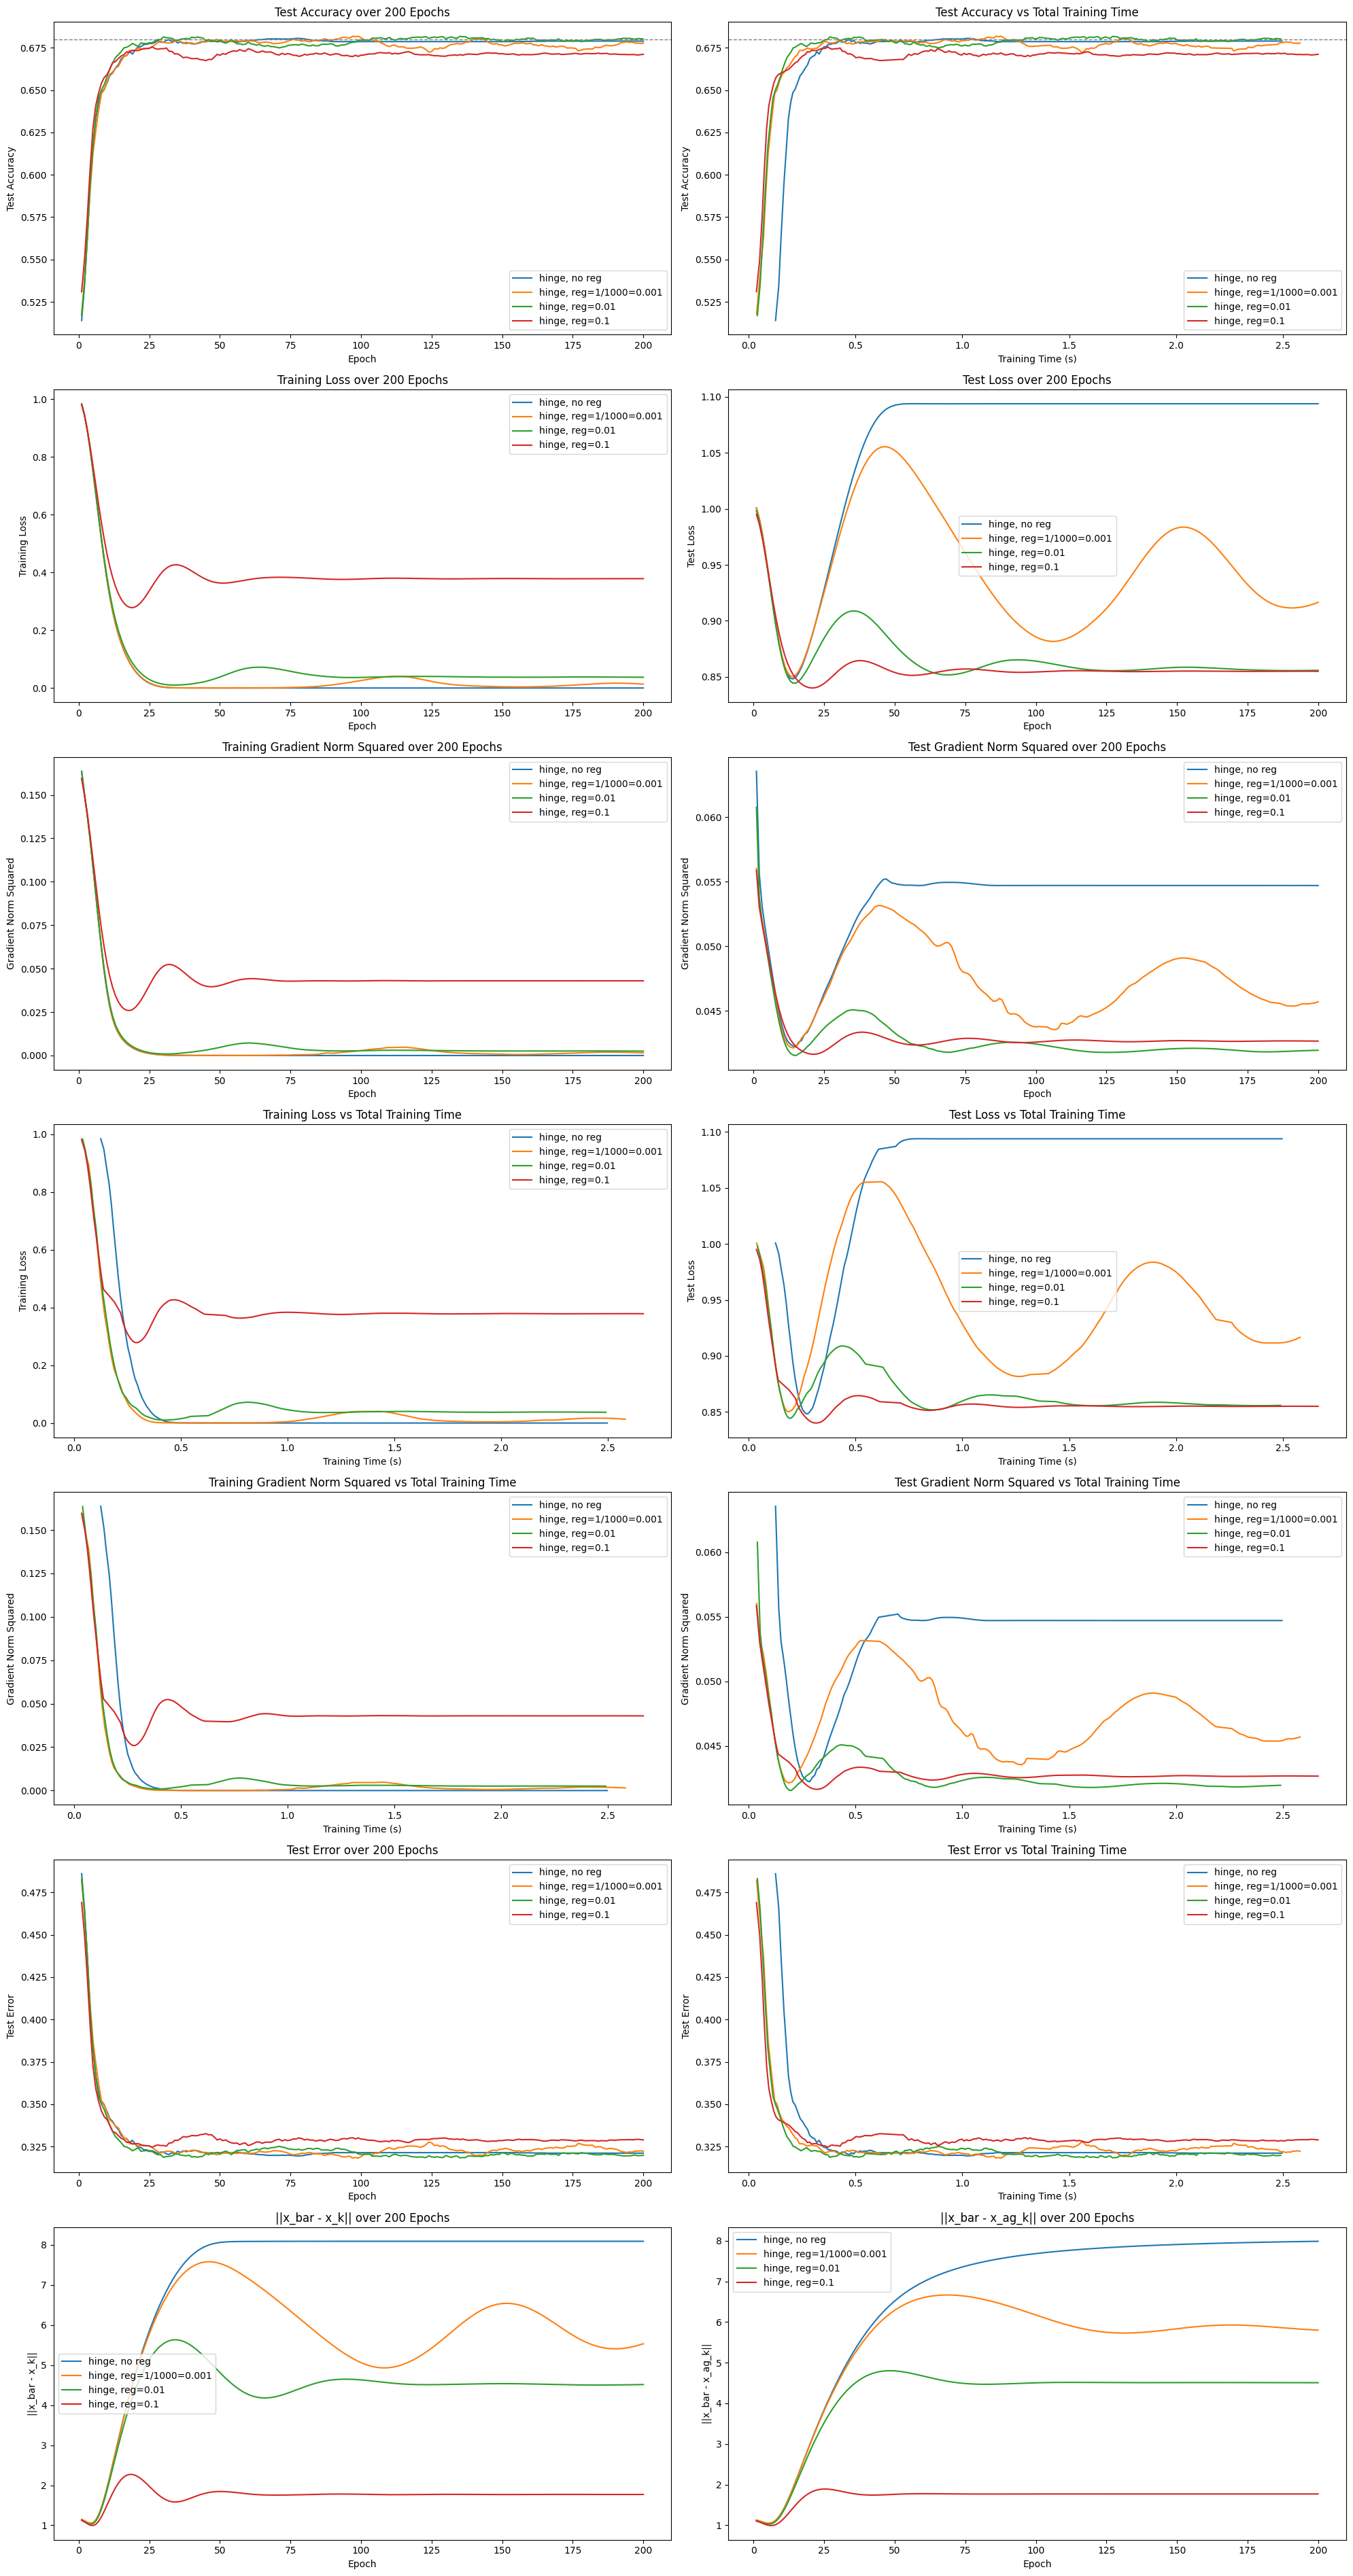

In [5]:
# hinge
ag = "generated/hinge/n_2000_m_1000/AG/lr-0.01/200/no_batching/no_wd/2024-10-31-10:34:12/results.csv"
ag2 = "generated/hinge/n_2000_m_1000/AG_reg/lr-0.01/200/no_batching/no_wd/2024-10-31-10:48:50/results.csv"
ag3 = "generated/hinge/n_2000_m_1000/AG_reg/lr-0.01/200/no_batching/no_wd/2024-10-31-10:54:31/results.csv"
ag4 = "generated/hinge/n_2000_m_1000/AG_reg/lr-0.01/200/no_batching/no_wd/2024-10-31-10:55:10/results.csv"


files = [ag, ag2, ag3, ag4]
labels = ["hinge, no reg", "hinge, reg=1/1000=0.001", "hinge, reg=0.01", "hinge, reg=0.1"]

plot_results(files, labels)

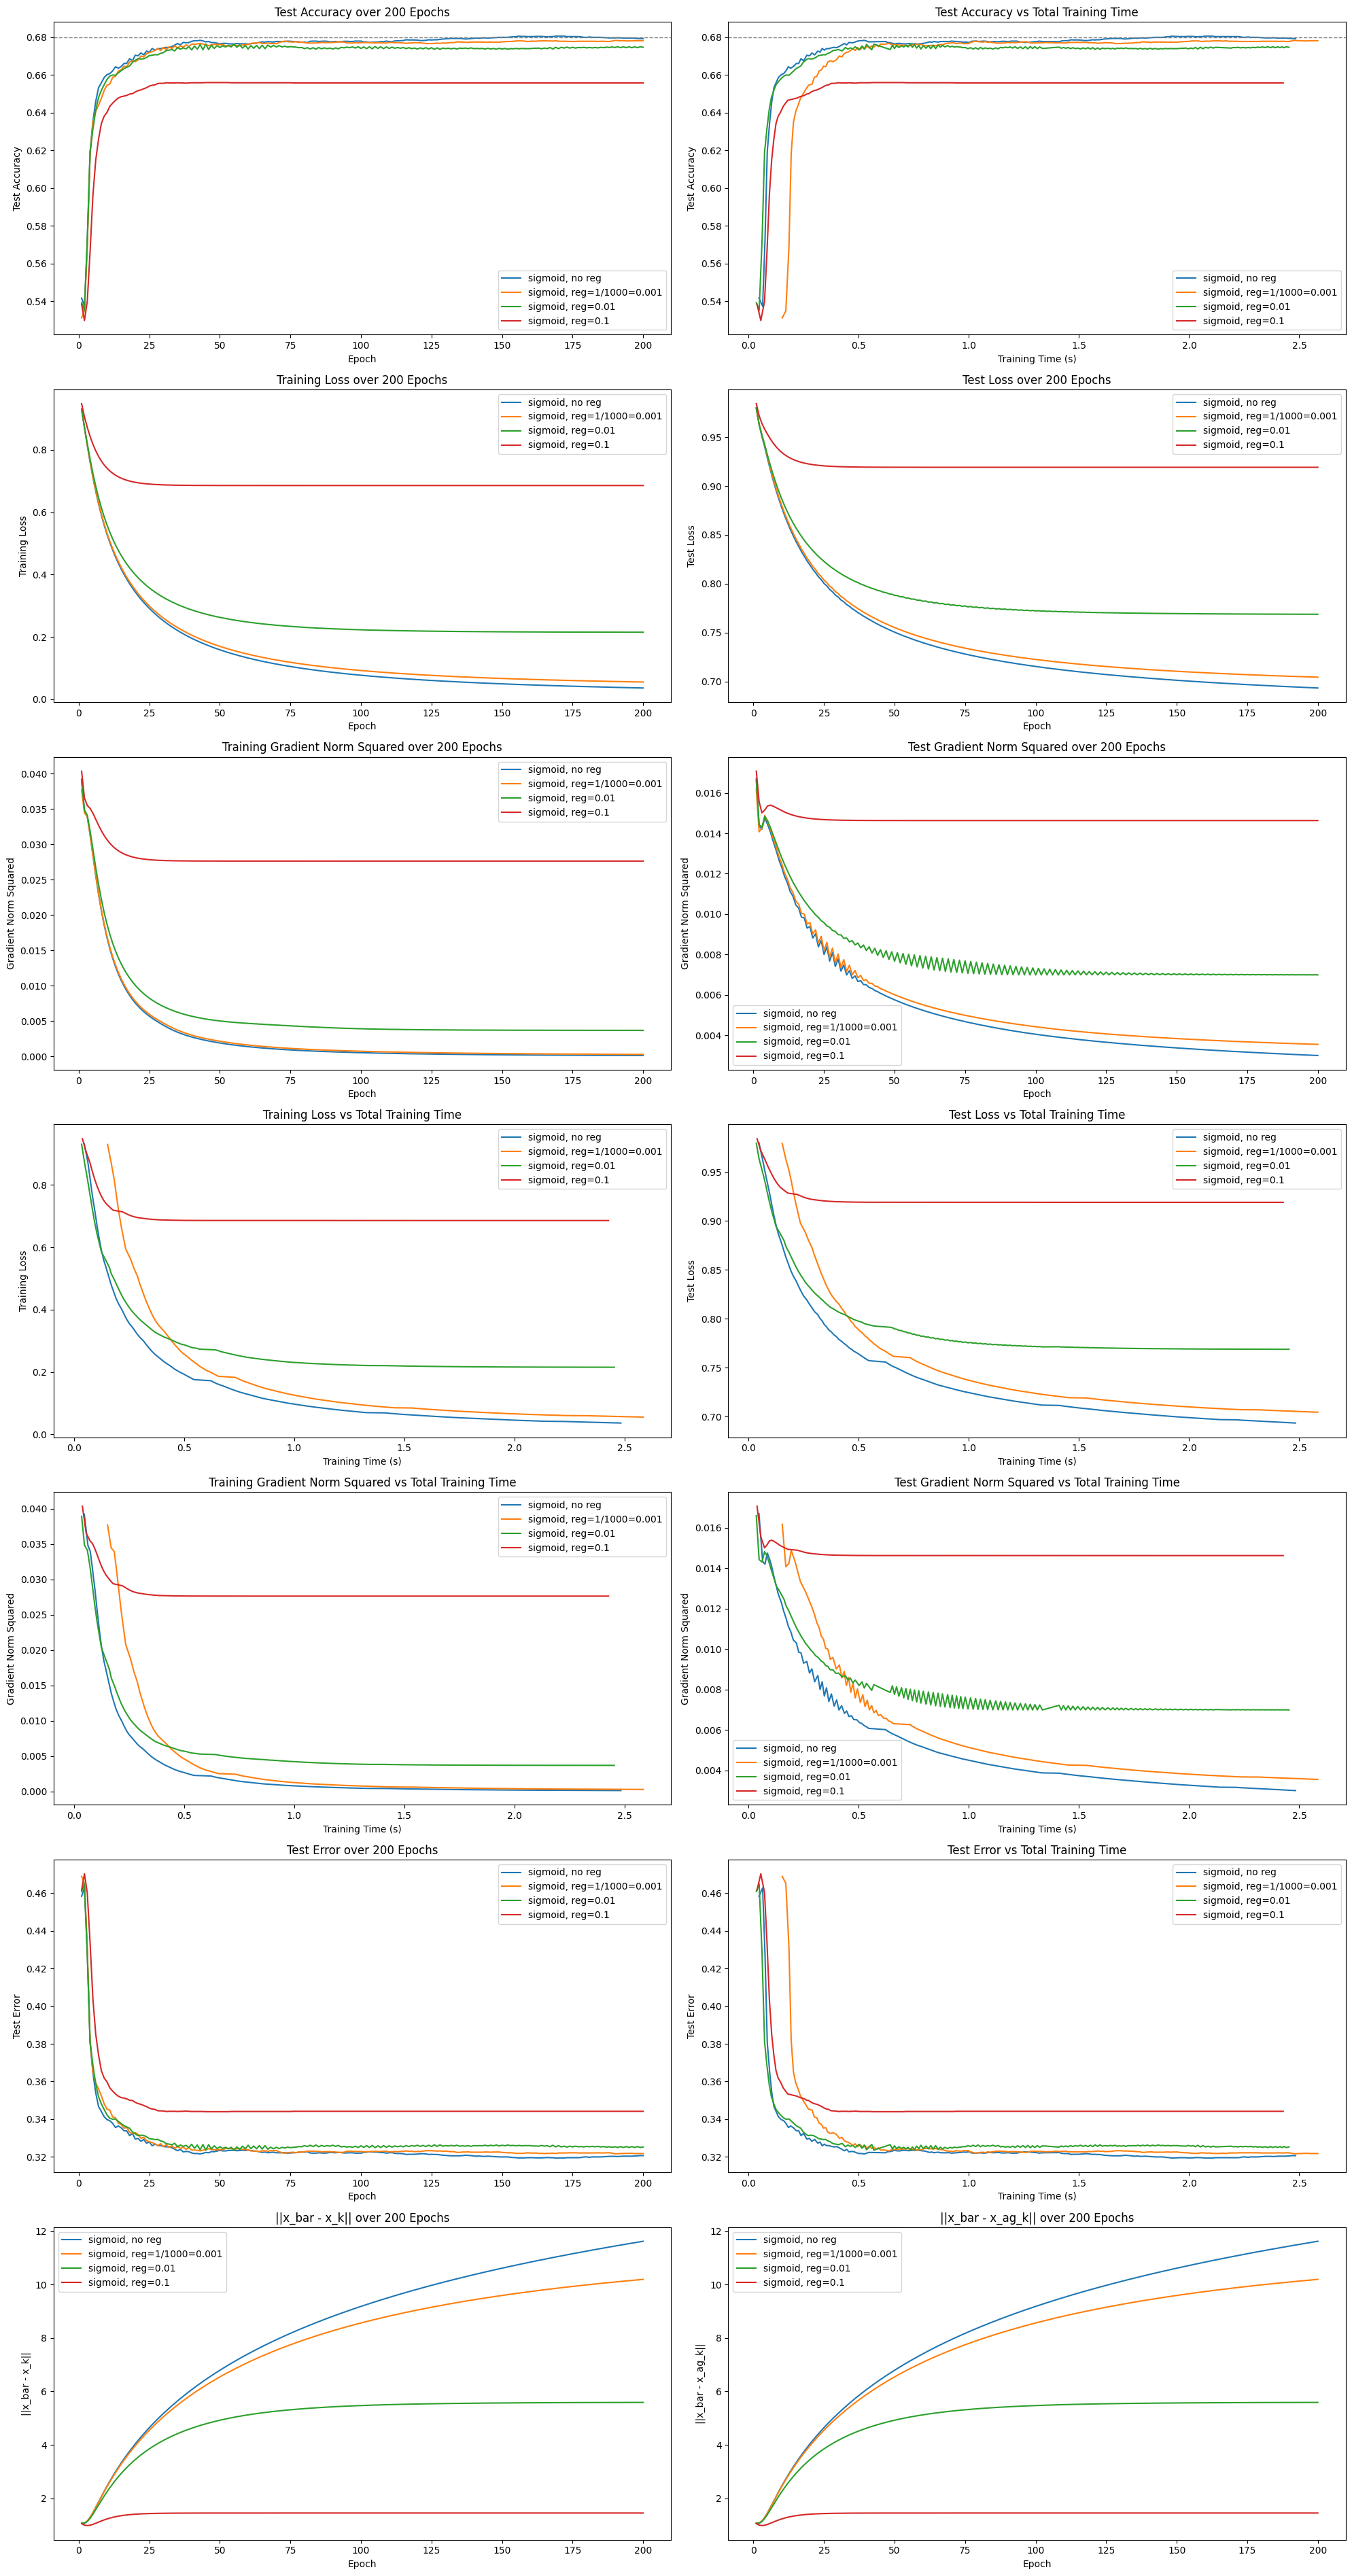

In [4]:
# sigmoid
ag = "generated/sigmoid/n_2000_m_1000/AG/lr-0.01/200/no_batching/no_wd/2024-10-31-10:35:07/results.csv"
ag2 = "generated/sigmoid/n_2000_m_1000/AG_reg/lr-0.01/200/no_batching/no_wd/2024-10-31-10:53:08/results.csv"
ag3 = "generated/sigmoid/n_2000_m_1000/AG_reg/lr-0.01/200/no_batching/no_wd/2024-10-31-10:54:16/results.csv"
ag4 = "generated/sigmoid/n_2000_m_1000/AG_reg/lr-0.01/200/no_batching/no_wd/2024-10-31-10:54:53/results.csv"


files = [ag, ag2, ag3, ag4]
labels = ["sigmoid, no reg", "sigmoid, reg=1/1000=0.001", "sigmoid, reg=0.01", "sigmoid, reg=0.1"]

plot_results(files, labels)

In [1]:
# hinge over 1000 epochs
ag = "generated/hinge/n_2000_m_1000/AG/lr-0.01/1000/no_batching/no_wd/2024-10-31-10:58:32/results.csv"
ag2 = "generated/hinge/n_2000_m_1000/AG_reg/lr-0.01/1000/no_batching/no_wd/2024-10-31-10:59:34/results.csv"
ag3 = "generated/hinge/n_2000_m_1000/AG_reg/lr-0.01/1000/no_batching/no_wd/2024-10-31-11:00:28/results.csv"
ag4 = "generated/hinge/n_2000_m_1000/AG_reg/lr-0.01/1000/no_batching/no_wd/2024-10-31-11:01:19/results.csv"


files = [ag, ag2, ag3, ag4]
labels = ["hinge, no reg", "hinge, reg=1/1000=0.001", "hinge, reg=0.01", "hinge, reg=0.1"]

plot_results(files, labels)

NameError: name 'plot_results' is not defined